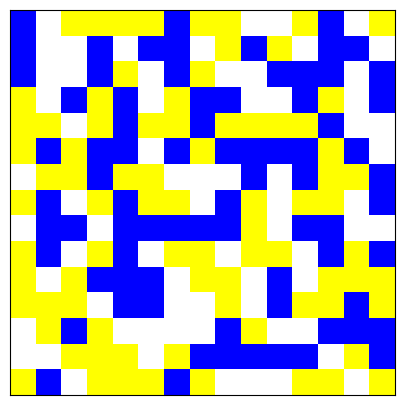

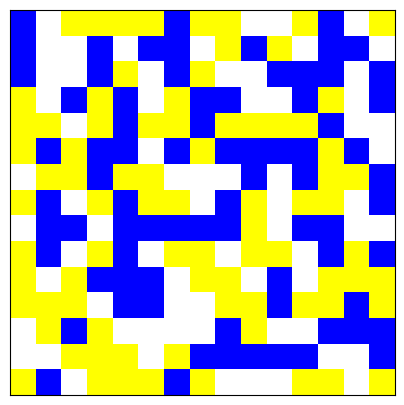

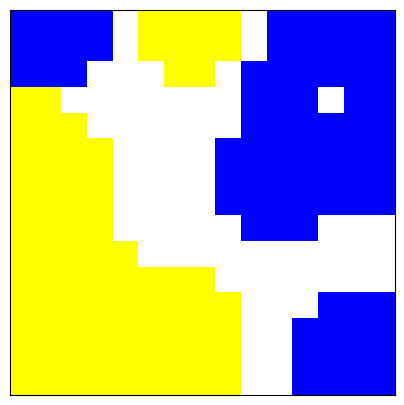

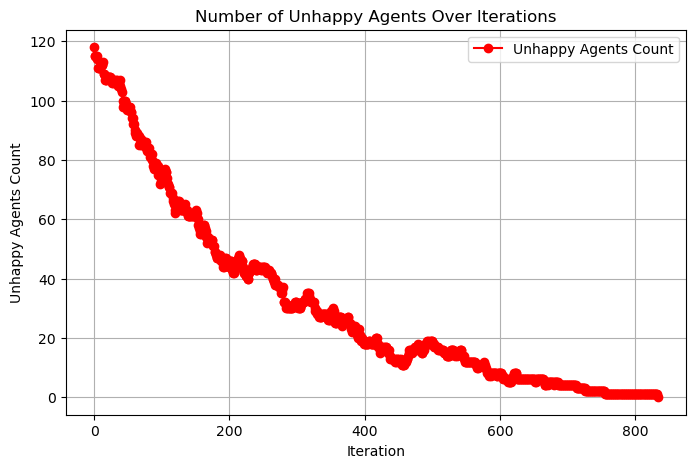

Pocet iteracii: 834
Vsetci agenti su spokojni. Simulacia dokoncena.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

# Schellingov model segregacie
tol = 0.50  # tolerancia
velkostMatice = 15 
# Inicializacia matice
matrix = [[random.choice(['E', 'Y', 'B']) for _ in range(velkostMatice)] for _ in range(velkostMatice)]
matrixSize = len(matrix)  # UxV

# neni nic take permanentne ako docasne riesenie
rep = matrix

# Zadanie Ulohy
# Implementovat funkci step(rep), která vezme jako vstup reprezentaci situace a aplikuje jeden krok dle Schellingova modelu, vrací pozměněnou reprezentaci 
def step(rep):
    # Vypocitaj spokojnost pre celu maticu
    satisfaction_matrix = calculate_satisfaction_matrix(rep)
    
    # Najdi nestastnych agentov
    unhappy_agents = calculate_unhappy_agents(satisfaction_matrix, tol)
    
    if unhappy_agents > 0:
        # Presun nestastneho agenta a aktualizuj spokojnost susedov
        rep, moved_agent = move_unhappy_agent(rep, satisfaction_matrix, tol)
        # Po presune aktualizuj spokojnost moved agenta a jeho susedov
        x, y = moved_agent
        satisfaction_matrix = update_satisfaction_matrix(satisfaction_matrix, rep, x, y)
    
    return rep  # Vrat aktualizovanu reprezentaciu

# Zadanie Ulohy
# Implementovat funkci plot(rep), která vykreslí na výstup aktuální situaci v reprezentaci
# Funkcia na vykreslenie grafu
def plot(rep):
    # Mapping farieb
    color_map = ListedColormap(['white', 'yellow', 'blue'])  # biela = E (prazdne), Y= zlta, B = modra
    # Numericka reprezentacia farieb, biela 0, zlta 1, modra 2
    numeric_rep = np.array([[0 if cell == 'E' else 1 if cell == 'Y' else 2 for cell in row] for row in rep])
    
    fig, ax = plt.subplots(figsize=(5, 5))  # nastav velkost grafu
    ax.imshow(numeric_rep, cmap=color_map, aspect='equal')   # zobraz ako obrazok
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()

# Funkcia na vykreslenie grafu s pocetom nestastnych agentov
def plot_unhappy_vs_all_agents(unhappy_agents_history, all_agents):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(unhappy_agents_history)), unhappy_agents_history, marker='o', linestyle='-', color='red', label='Unhappy Agents Count')
    
    # Labels a nadpis
    plt.xlabel('Iteration')
    plt.ylabel('Unhappy Agents Count')
    plt.title('Number of Unhappy Agents Over Iterations')
    plt.grid(True)
    plt.legend()
    
    # Nagrafovat
    plt.show()

# Aktualizuje spokojnost matice pre presunuteho agenta a jeho susedov
def update_satisfaction_matrix(satisfaction_matrix, rep, x, y):
    rows, cols = len(rep), len(rep[0])
    
    # Skontroluj 3x3 okolie presunuteho agenta
    for i in range(x - 1, x + 2):
        for j in range(y - 1, y + 2):
            if 0 <= i < rows and 0 <= j < cols:
                satisfaction_matrix[i][j] = calculate_satisfaction(rep, i, j)
    
    return satisfaction_matrix


# Vypocita spokojnost pre dany agent na pozicii (x, y)
def calculate_satisfaction(rep, x, y):
    rows, cols = len(rep), len(rep[0])
    
    if rep[x][y] == 'E':  # Prazdne bunky su vzdy spokojne
        return 1

    neighbors = []

    for i in range(x - 1, x + 2):
        for j in range(y - 1, y + 2):
            if 0 <= i < rows and 0 <= j < cols:
                if (i, j) != (x, y):  # Vylucime samotnu bunku
                    neighbors.append(rep[i][j])
    
    same_type_count = sum(1 for neighbor in neighbors if neighbor == rep[x][y])
    satisfaction = same_type_count / len(neighbors)  # Spokojnost na zaklade rovnakych typov susedov
    return satisfaction


# Vypocita spokojnost pre celu maticu
def calculate_satisfaction_matrix(rep):
    return [[calculate_satisfaction(rep, i, j) for j in range(len(rep[0]))] for i in range(len(rep))]

'''
Originalny tvar funkcie:
def calculate_satisfaction_matrix(rep):
    satisfaction_matrix = []
    # vypocitaj spokojnost pre kazdu bunku rep
    for i in range(len(rep)):
        row_satisfaction = []
        for j in range(len(rep[i])):
            satisfaction = calculate_satisfaction(rep, i, j)
            row_satisfaction.append(satisfaction)
        satisfaction_matrix.append(row_satisfaction)
    return satisfaction_matrix
'''

# Vypocita pocet nestastnych agentov
def calculate_unhappy_agents(satisfaction_matrix, tol):
    return sum(1 for i in range(len(satisfaction_matrix)) for j in range(len(satisfaction_matrix[0])) if satisfaction_matrix[i][j] < tol and satisfaction_matrix[i][j] != 1)

''' 
Original tvar funkcie:
def calculate_unhappy_agents(satisfaction_matrix, tol):
    unhappyAgentsCount = 0
    # Prejdi cez matice a zisti pocet ne-stastnych agentov
    for i in range(len(satisfaction_matrix)):
        for j in range(len(satisfaction_matrix[i])):
            if satisfaction_matrix[i][j] < tol and satisfaction_matrix[i][j] != 1:  # tolerancia = "spokojnost"
                unhappyAgentsCount += 1
    return unhappyAgentsCount
'''

# Presunie nestastneho agenta na nahodne prazdne miesto
def move_unhappy_agent(rep, satisfaction_matrix, tol):
    rows, cols = len(rep), len(rep[0])
    
    unhappy_agent_found = False
    while not unhappy_agent_found:
        x, y = random.randint(0, rows - 1), random.randint(0, cols - 1)
        
        # Ak je agent nestastny (a je to agent)
        if rep[x][y] != 'E' and satisfaction_matrix[x][y] < tol:
            unhappy_agent_found = True
            unhappy_agent = (x, y)
    
    # Teraz vyberieme nahodne prazdne miesto
    empty_spot_found = False
    while not empty_spot_found:
        x_empty, y_empty = random.randint(0, rows - 1), random.randint(0, cols - 1)
        
        # Skontrolujeme, ci je miesto prazdne
        if rep[x_empty][y_empty] == 'E':
            empty_spot_found = True
            empty_spot = (x_empty, y_empty)
    
    # Prehodime hodnoty medzi agentom a prazdnym miestom
    agent_x, agent_y = unhappy_agent
    empty_x, empty_y = empty_spot
    
    agent_color = rep[agent_x][agent_y]
    
    rep[agent_x][agent_y] = 'E'  # Prazdne miesto
    rep[empty_x][empty_y] = agent_color  # Agent sa presunie na prazdne miesto

    return rep, unhappy_agent


# Funkcia na spustenie simulacie
def run_simulation(rep):
    iteration = 0
    all_agents = sum(1 for row in rep for cell in row if cell != 'E')  # Pocet vsetkych agentov
    unhappy_agents_history = []  # Historie pocitu nestastnych agentov
    
    while True:
        # Jeden krok simulacie
        rep = step(rep)
        
        # Spocitame pocet nestastnych agentov
        satisfaction_matrix = calculate_satisfaction_matrix(rep)
        unhappy_agents = calculate_unhappy_agents(satisfaction_matrix, tol)
        unhappy_agents_history.append(unhappy_agents)
        if iteration % 1000 == 0:
            plot(rep)
        
        # Zvysime pocet iteracii
        iteration += 1

        # Ak nie su nestastni agenti, ukoncime simulaciu
        if unhappy_agents == 0:
            # Zobrazime graf
            plot(rep)
            plot_unhappy_vs_all_agents(unhappy_agents_history, all_agents)
            print(f"Pocet iteracii: {iteration}")
            print("Vsetci agenti su spokojni. Simulacia dokoncena.")
            break



plot(rep)  # Nakreslit pociatocny stav matice
# spustit algoritmus
run_simulation(rep)